# Task 3: Exploratory Data Analysis

## Author: Sangharsh S Patil

###  Aim Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 

In [1]:

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Exploratory Data Analysis
## 1.State and Cities
### State wise Dealing

In [5]:
states=df['State'].value_counts().reset_index()

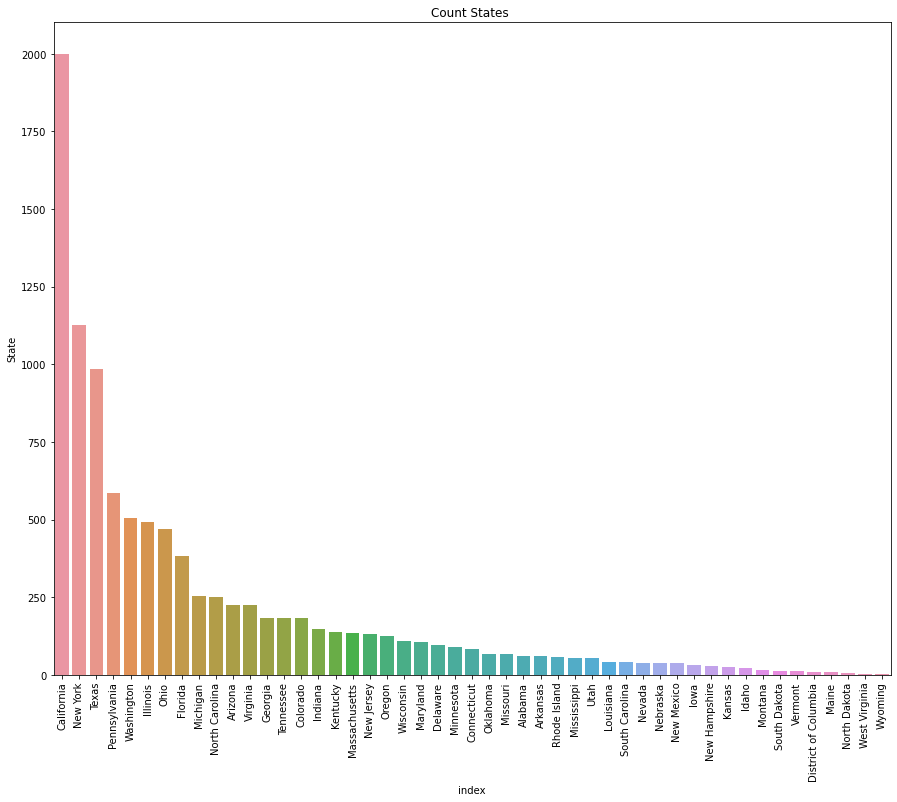

In [6]:
plt.figure(figsize=(15,12))
sns.barplot(x='index' , y = 'State', data = states)
plt.title('Count States ')
plt.xticks(rotation=90)
plt.show()

### Higest Profitable States

In [7]:
sorted_city=df.groupby('State').mean()['Profit'].sort_values(ascending= False).reset_index()

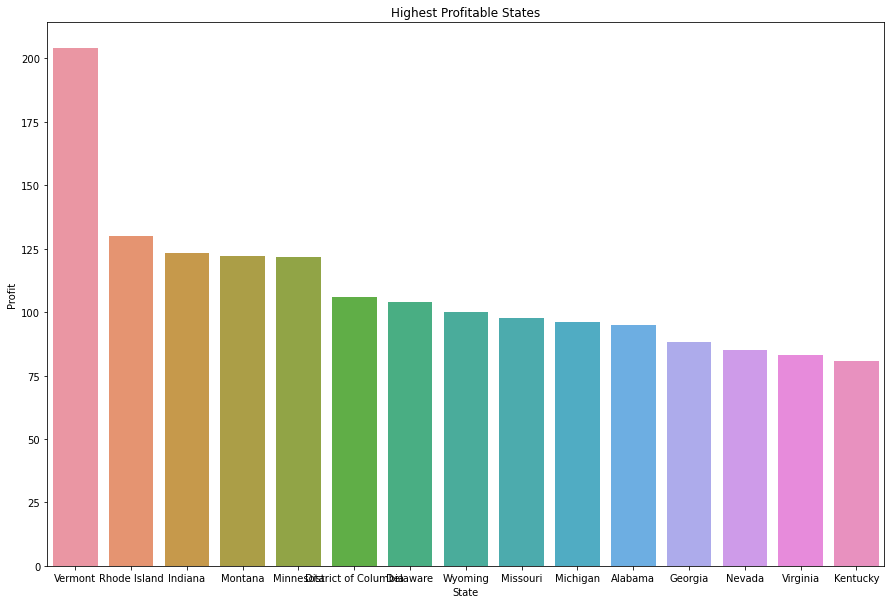

In [8]:

plt.figure(figsize=(15,10))
plt.title('Highest Profitable States')
sns.barplot(x = sorted_city['State'][:15],y = sorted_city['Profit'][:15])
plt.show()

In [9]:
sorted_city.shape

(49, 2)

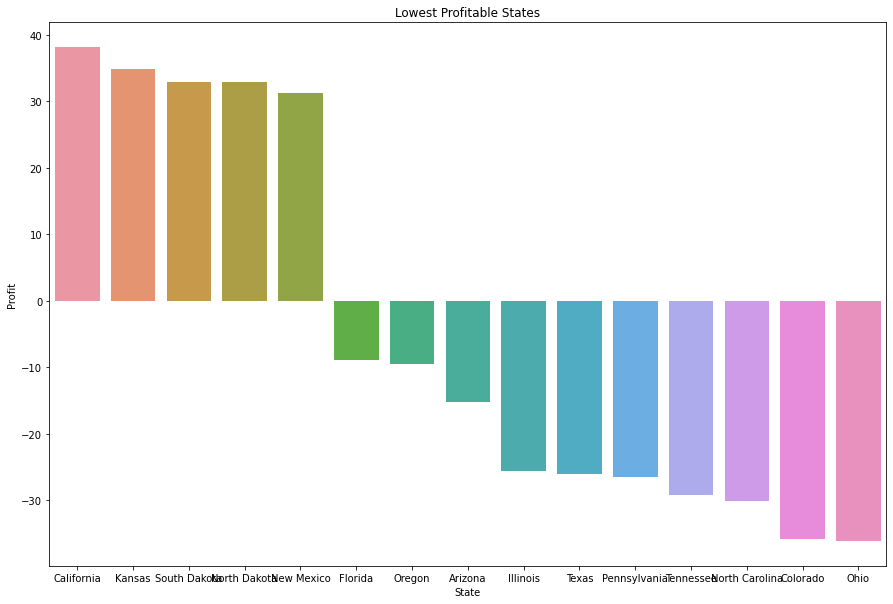

In [10]:
plt.figure(figsize=(15,10))
plt.title('Lowest Profitable States')
sns.barplot(x = sorted_city['State'][34:],y = sorted_city['Profit'][34:])
plt.show()

### City wise Dealing

In [11]:

City=df['City'].value_counts().reset_index()

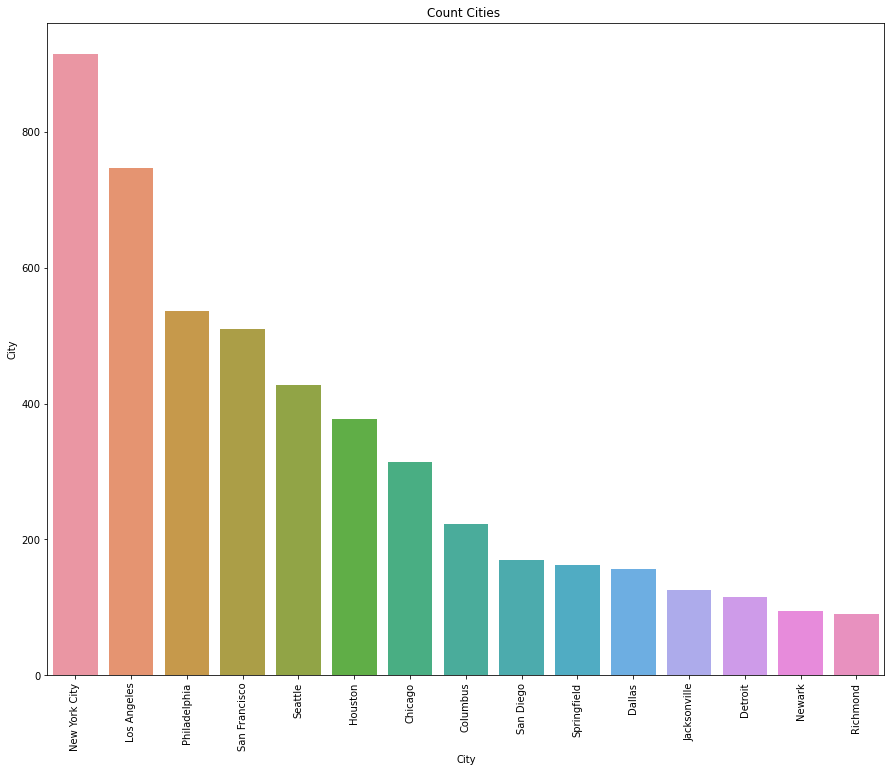

In [12]:
plt.figure(figsize=(15,12))
sns.barplot(x='index' , y = 'City', data = City[:15])
plt.title('Count Cities ')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()

### High Profitable Cities

In [13]:
Profit_city =df.groupby('City').mean()['Profit'].sort_values(ascending = False).reset_index()

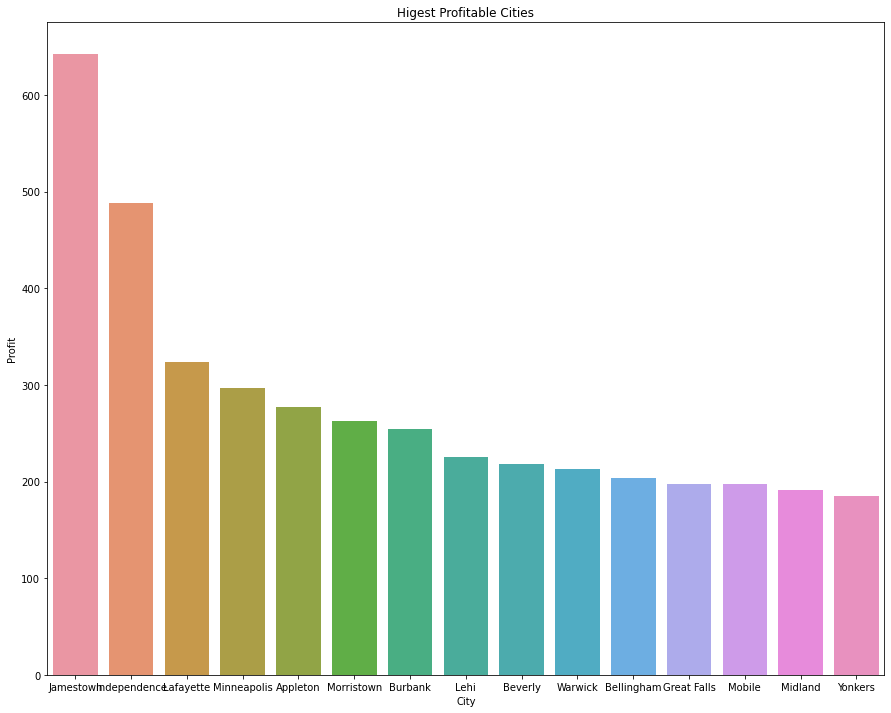

In [14]:
plt.figure(figsize=(15,12))
plt.title('Higest Profitable Cities')
sns.barplot( x = 'City', y ='Profit',data = Profit_city[:15])
plt.show()

### Low Profitable Cities

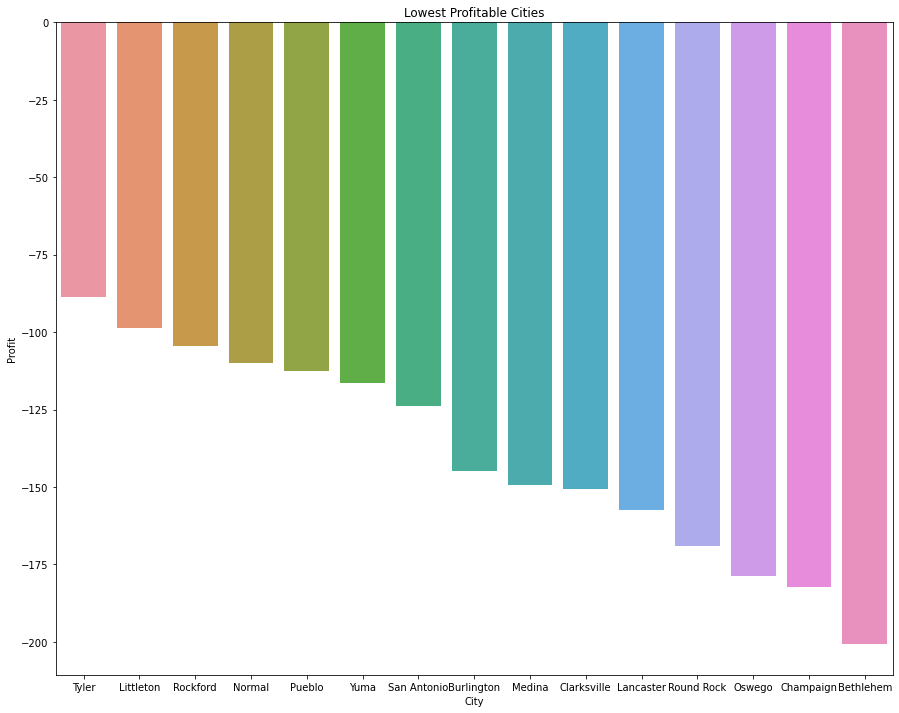

In [15]:
plt.figure(figsize=(15,12))
plt.title('Lowest Profitable Cities')
sns.barplot( x = 'City', y ='Profit',data = Profit_city.tail(15))
plt.show()

### Sales with State

In [16]:
Profit_city =df.groupby('State').mean()['Sales'].sort_values(ascending = False).reset_index()

### Highest Amount of Sales with States 

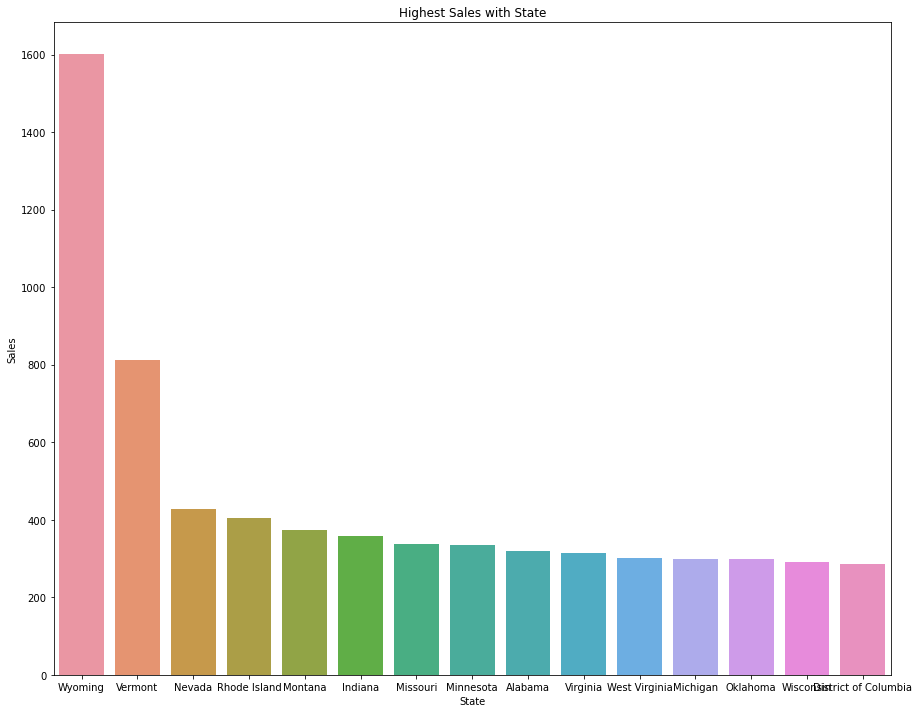

In [17]:

plt.figure(figsize=(15,12))
plt.title('Highest Sales with State')
sns.barplot( x = 'State', y ='Sales',data = Profit_city.head(15))
plt.show()

### Lowest amount of Sales with State 

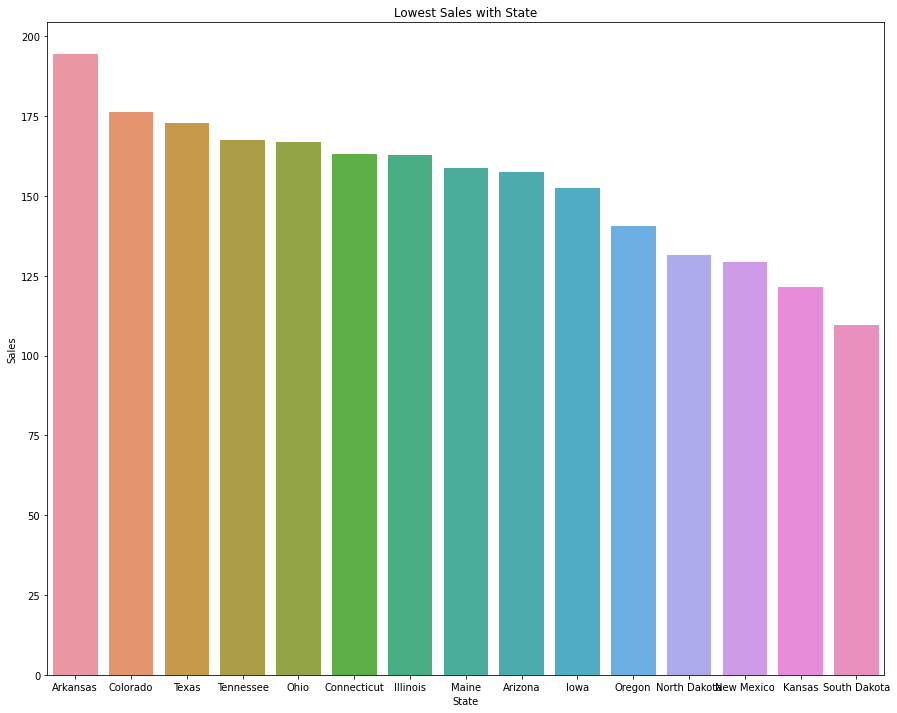

In [18]:
plt.figure(figsize=(15,12))
plt.title('Lowest Sales with State')
sns.barplot( x = 'State', y ='Sales',data = Profit_city.tail(15))
plt.show()

### Histogram 

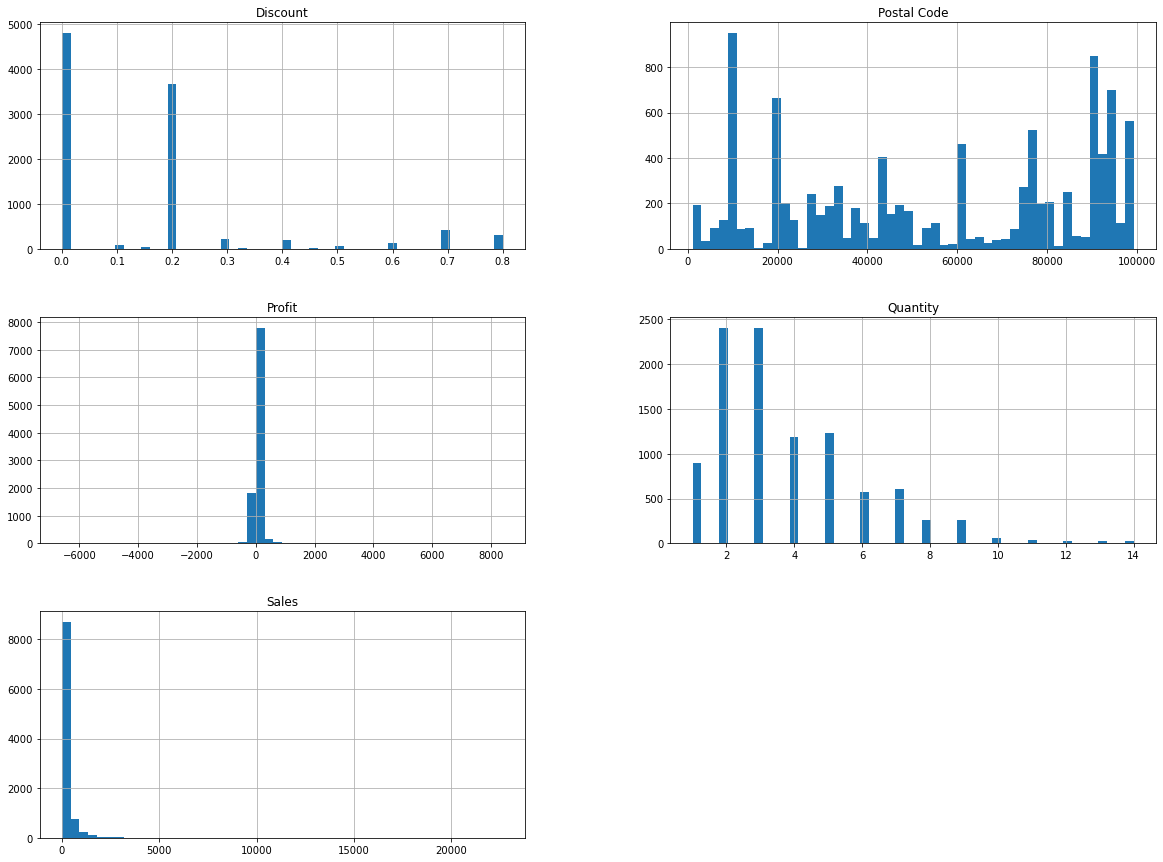

In [19]:

df.hist(bins=50 ,figsize=(20,15))
plt.show();

##  2.Category and Sub-Category
### Count Categories

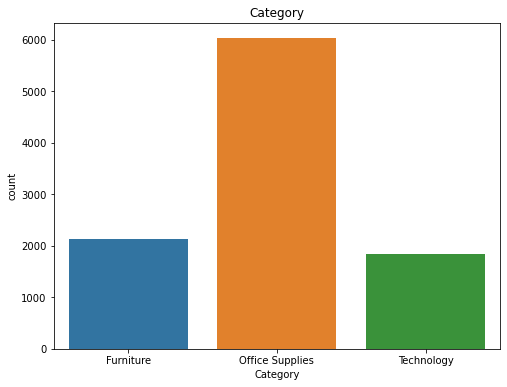

In [20]:
plt.figure(figsize=(8,6))
plt.title('Category')
sns.countplot(df['Category'])
plt.show()

### Number of Sub-Category 

Text(0.5, 1.0, 'Sub-Category')

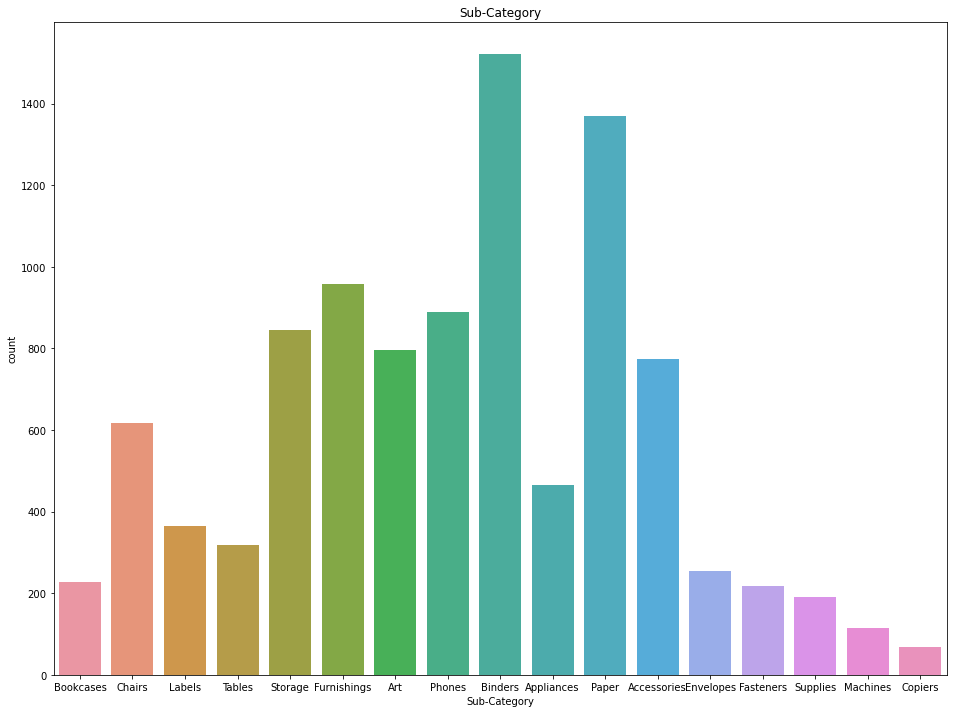

In [21]:
plt.figure(figsize=(16,12))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category')

### Profit According to Category 

In [22]:
df[df['Category']=='Technology']['Profit'].sum()

145454.9481

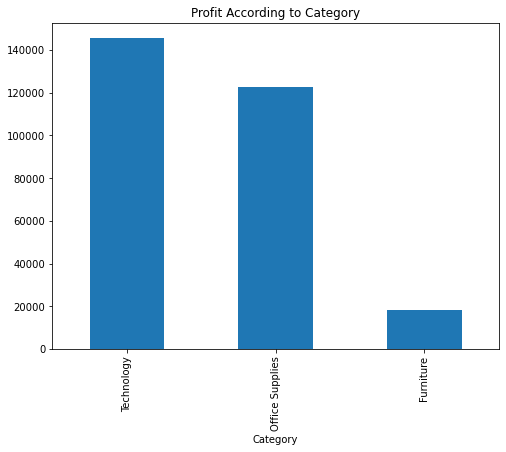

In [23]:
plt.figure(figsize=(8,6))
plt.title('Profit According to Category')
df.groupby('Category').sum()['Profit'].sort_values(ascending= False).plot(kind = 'bar')
# plt.xticks(rotation=90)
plt.show()

### Profit according to sub-category

In [24]:
sub_category_pro=df.groupby('Sub-Category').mean()['Profit'].sort_values(ascending = False).reset_index()

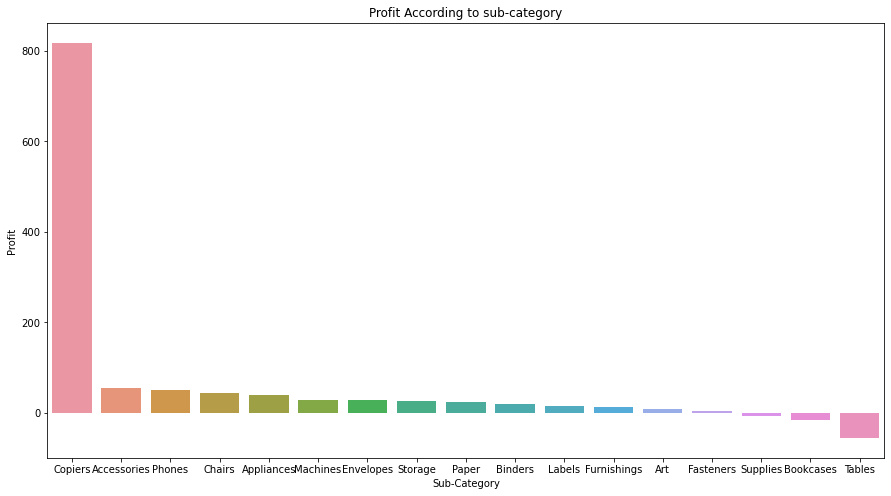

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x ='Sub-Category', y ='Profit',data=sub_category_pro)
plt.title('Profit According to sub-category')
plt.show()

### Which Sub-Category Suffering from highest loss

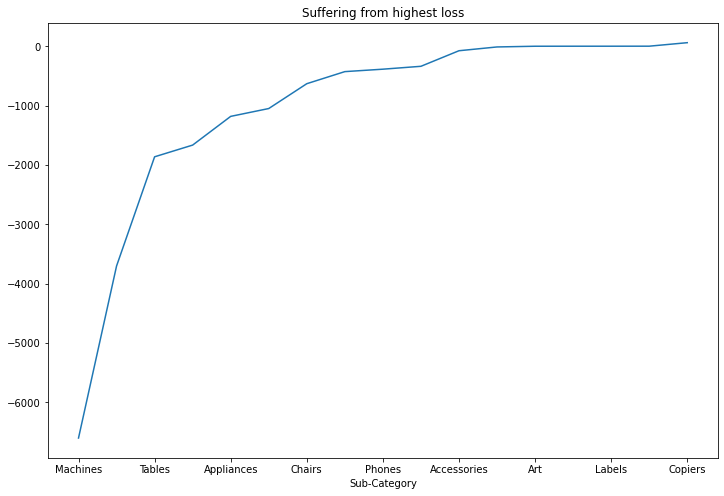

In [26]:
plt.figure(figsize=(12,8))
plt.title('Suffering from highest loss')
df.groupby('Sub-Category')['Profit'].min().sort_values().plot()
plt.show()

### Which Sub-Category has gain highest amount of profit with no loss

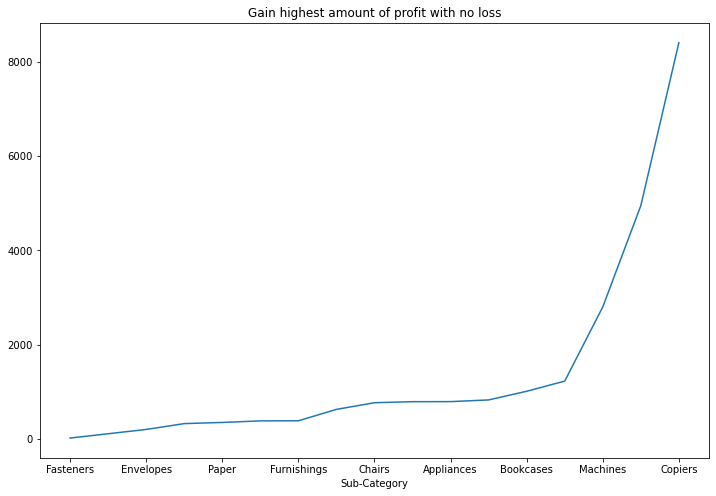

In [28]:
plt.figure(figsize=(12,8))
plt.title('Gain highest amount of profit with no loss')
df.groupby('Sub-Category')['Profit'].max().sort_values().plot()
plt.show()


#### Above Bar Plot Shows "Copiers" Sub-category has gain highest amount of profit with no loss and "Machines" Sub-Category has lowest amount of profit

### 3.Ship Mode
#### Count Ship Mode 

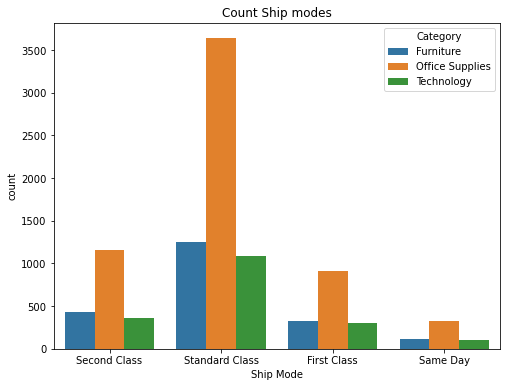

In [29]:
plt.figure(figsize = (8,6))
sns.countplot('Ship Mode',data = df, hue='Category')
plt.title('Count Ship modes')
plt.show()


### Profit According to Ship Mode

In [30]:
ship_modes=df.groupby('Ship Mode').mean()['Profit'].sort_values(ascending = False).reset_index()

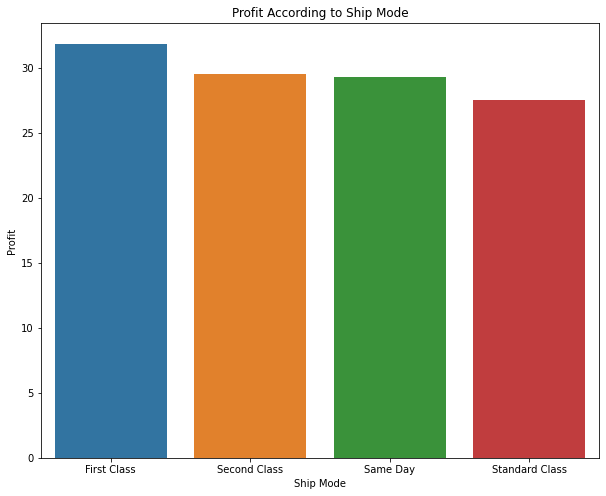

In [31]:
plt.figure(figsize=(10,8))
plt.title('Profit According to Ship Mode')
sns.barplot(x ='Ship Mode', y= 'Profit', data = ship_modes)
plt.show()

### Discount Accourding to Ship Mode

In [32]:

ship_modes=df.groupby('Ship Mode').mean()['Discount'].sort_values(ascending = False).reset_index()

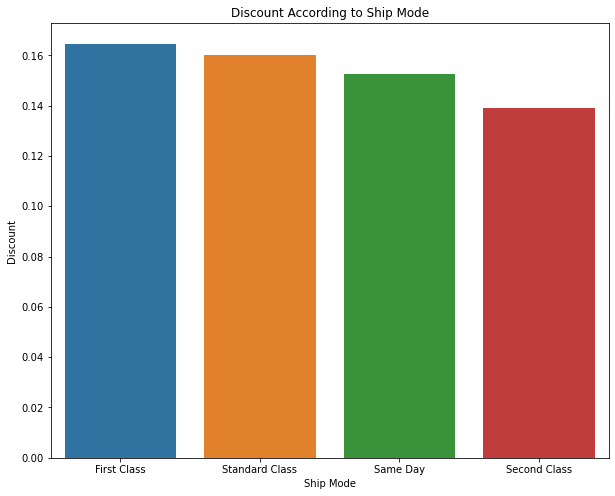

In [33]:
plt.figure(figsize=(10,8))
plt.title('Discount According to Ship Mode')
sns.barplot(x ='Ship Mode', y= 'Discount', data = ship_modes)
plt.show()

### 4.Segment¶
#### Count Segments 

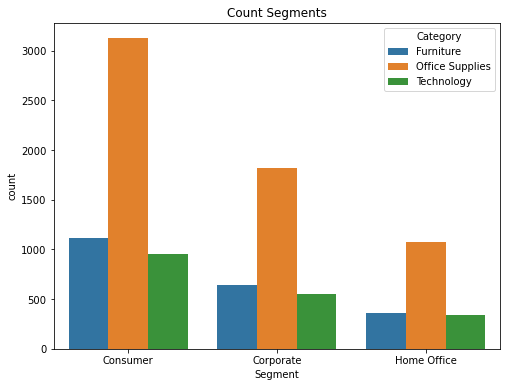

In [34]:

plt.figure(figsize=(8,6))
sns.countplot(df['Segment'], hue=df['Category'])
plt.title('Count Segments')
plt.show()

In [35]:
segment= df.groupby('Segment').mean()['Profit'].sort_values(ascending= False).reset_index()

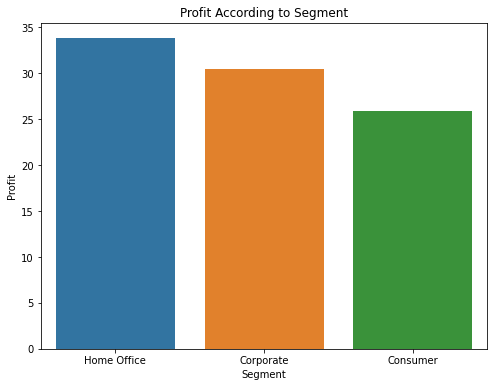

In [36]:
plt.figure(figsize=(8,6))
plt.title('Profit According to Segment')
sns.barplot(x ='Segment', y = 'Profit', data = segment)
plt.show()

### Sales According to Segement 

In [37]:
segment= df.groupby('Segment').mean()['Sales'].sort_values(ascending= False).reset_index()

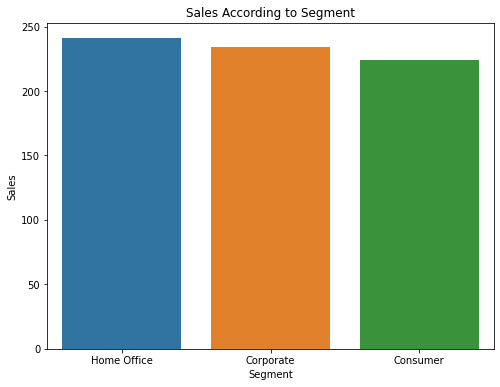

In [38]:
plt.figure(figsize=(8,6))
plt.title('Sales According to Segment')
sns.barplot(x ='Segment', y = 'Sales', data = segment)
plt.show()

### Discount According to Segment 

In [39]:
segment= df.groupby('Segment').mean()['Discount'].sort_values(ascending= False).reset_index()

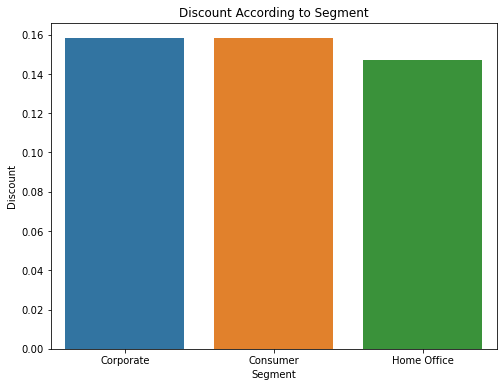

In [40]:

plt.figure(figsize=(8,6))
plt.title('Discount According to Segment')
sns.barplot(x ='Segment', y = 'Discount', data = segment)
plt.show()

### 5.Region¶
#### Count Regions 

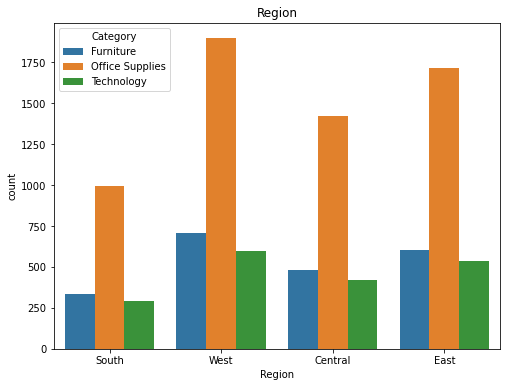

In [41]:
plt.figure(figsize=(8,6))
plt.title('Region')
sns.countplot(df['Region'], hue=df['Category'])
plt.show()

### Region according to Profit

In [42]:
region=df.groupby('Region').mean()['Profit'].sort_values().reset_index()

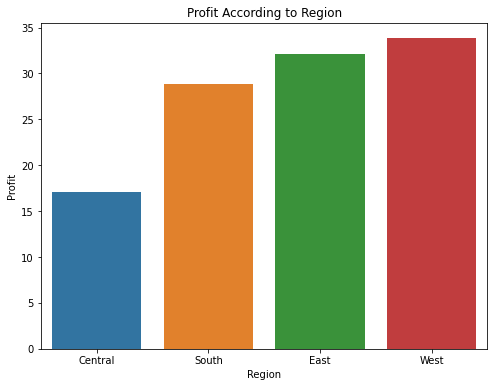

In [43]:
plt.figure(figsize=(8,6))
plt.title('Profit According to Region')
sns.barplot(x='Region', y ='Profit', data= region)
plt.show()

In [44]:
region=df.groupby('Region').mean()['Discount'].sort_values().reset_index()

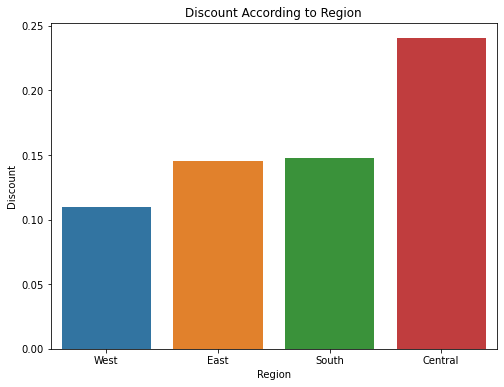

In [45]:
plt.figure(figsize=(8,6))
plt.title('Discount According to Region')
sns.barplot(x='Region', y ='Discount', data= region)
plt.show()

### 6.Pairplot 

In [46]:
df = df.drop(['Postal Code'], axis =1)

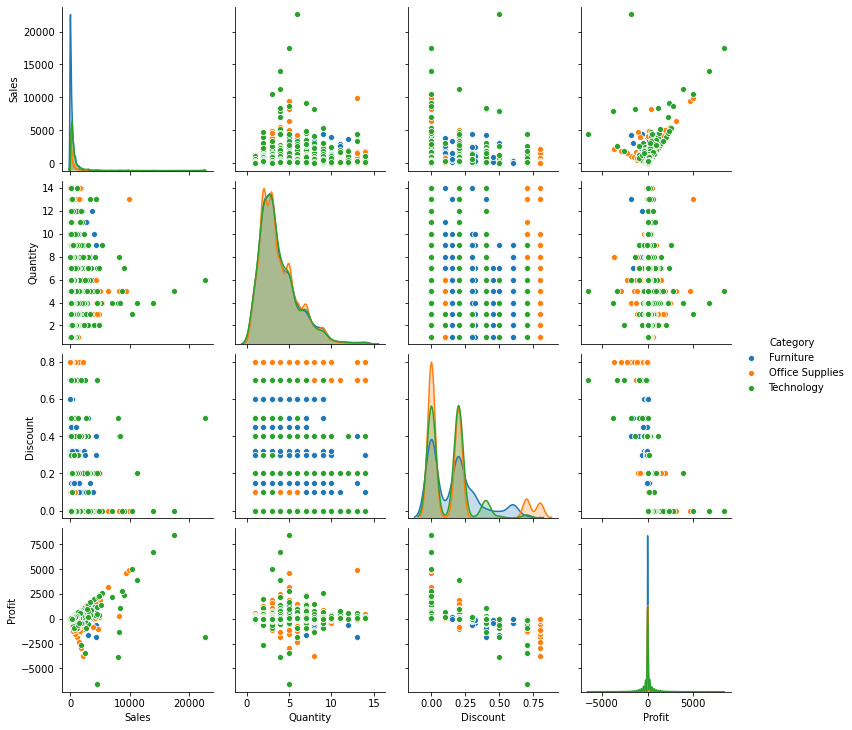

In [47]:
sns.pairplot(data = df, hue='Category')

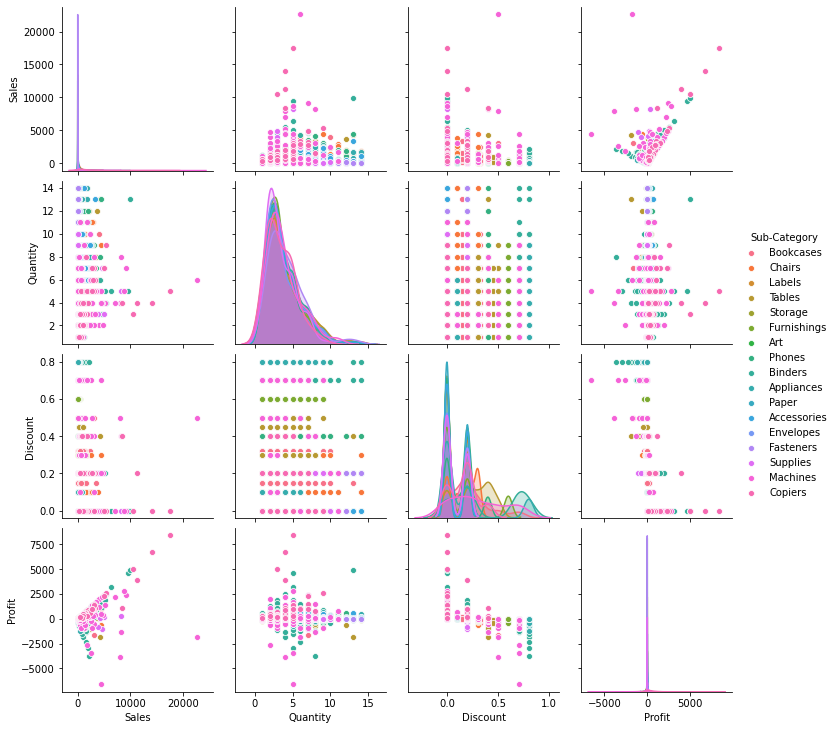

In [48]:
sns.pairplot(data = df, hue='Sub-Category')

### 7.Relationship Between Sales and Profit 

In [66]:
sales_profit =df[['Sales', 'Profit']]

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Sales Vs Profit')
sns.lineplot('Sales','Profit', data=df , color='r',label='Sales')

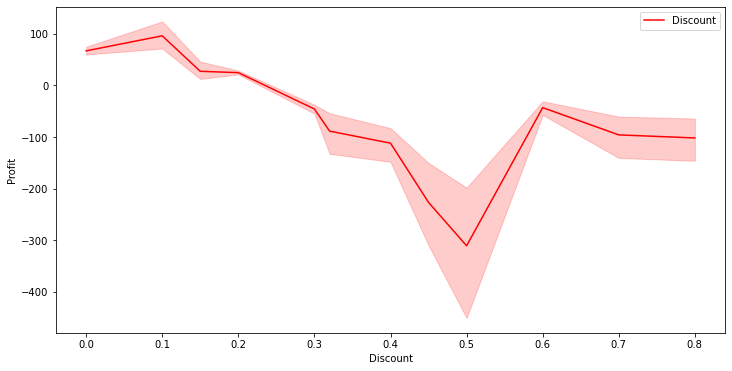

In [51]:

plt.figure(figsize=(12,6))
sns.lineplot('Discount','Profit', data=df , color='r',label='Discount')
plt.legend()
plt.show()

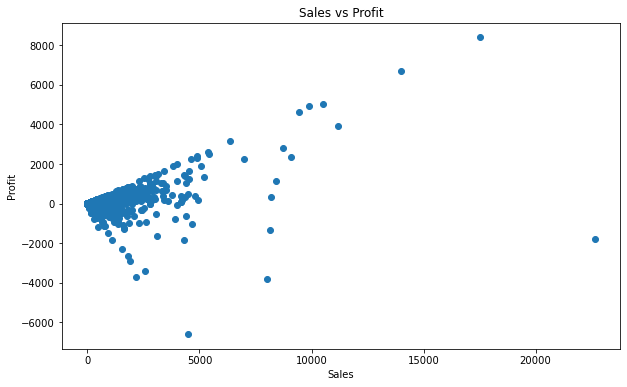

In [52]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_title('Sales vs Profit')
plt.show()

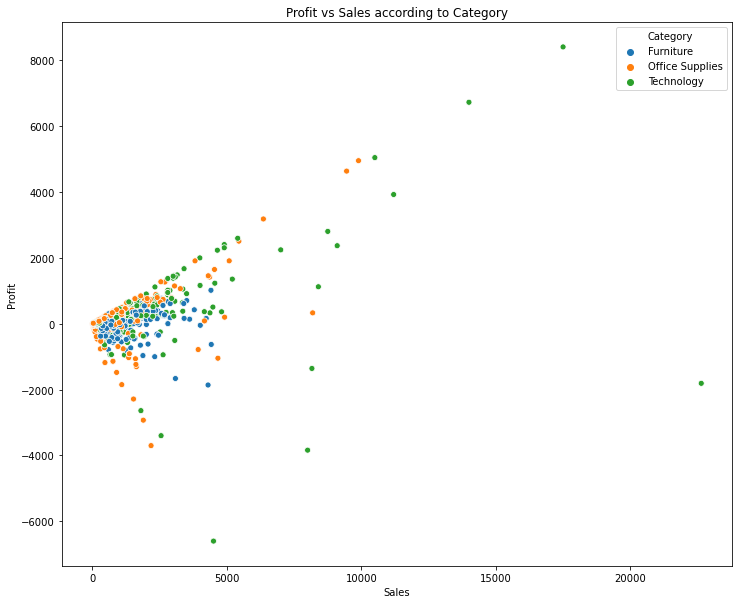

In [53]:
plt.figure(figsize= (12,10))
plt.title('Profit vs Sales according to Category')
sns.scatterplot(x= df['Sales'], y =df['Profit'], hue =df['Category'])
plt.show()

#### Profit is more than that of sale but there are some areas where profit could be increased. 

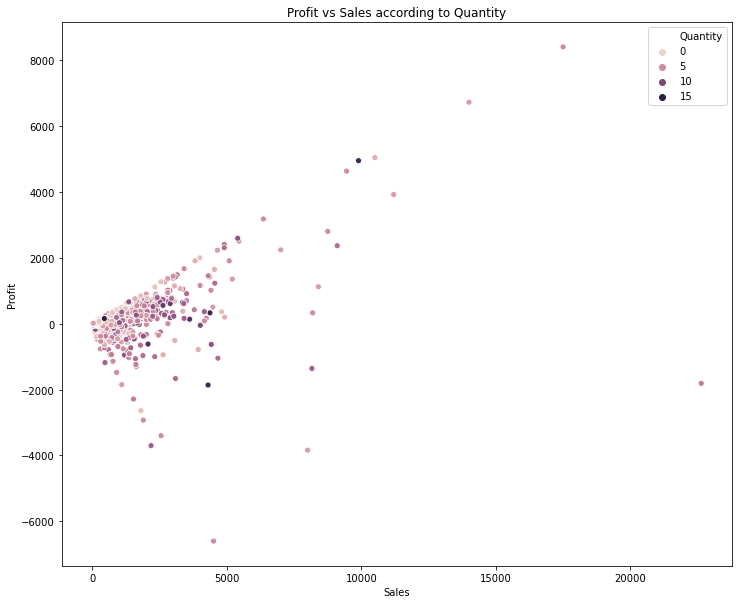

In [54]:
plt.figure(figsize= (12,10))
plt.title('Profit vs Sales according to Quantity')
sns.scatterplot(x= df['Sales'], y =df['Profit'], hue =df['Quantity'])
plt.show()

In [55]:
sorted_city.head()

,State,Profit
0,Vermont,204.088936
1,Rhode Island,130.100523
2,Indiana,123.375411
3,Montana,122.221900
4,Minnesota,121.608847


### 8. Product categories and sub-categories for 5 Highest Profitable states 

In [56]:

def state_data_viewer(states):
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (32,8))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

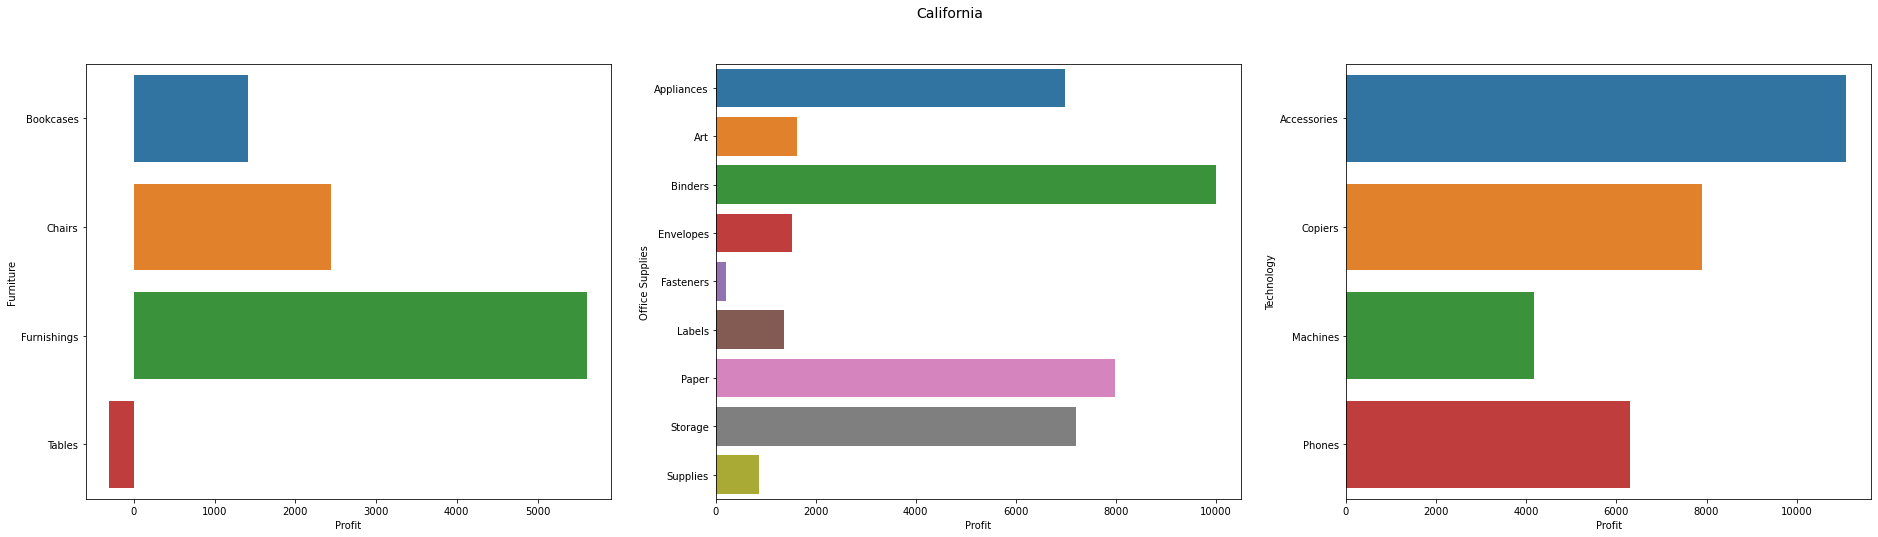

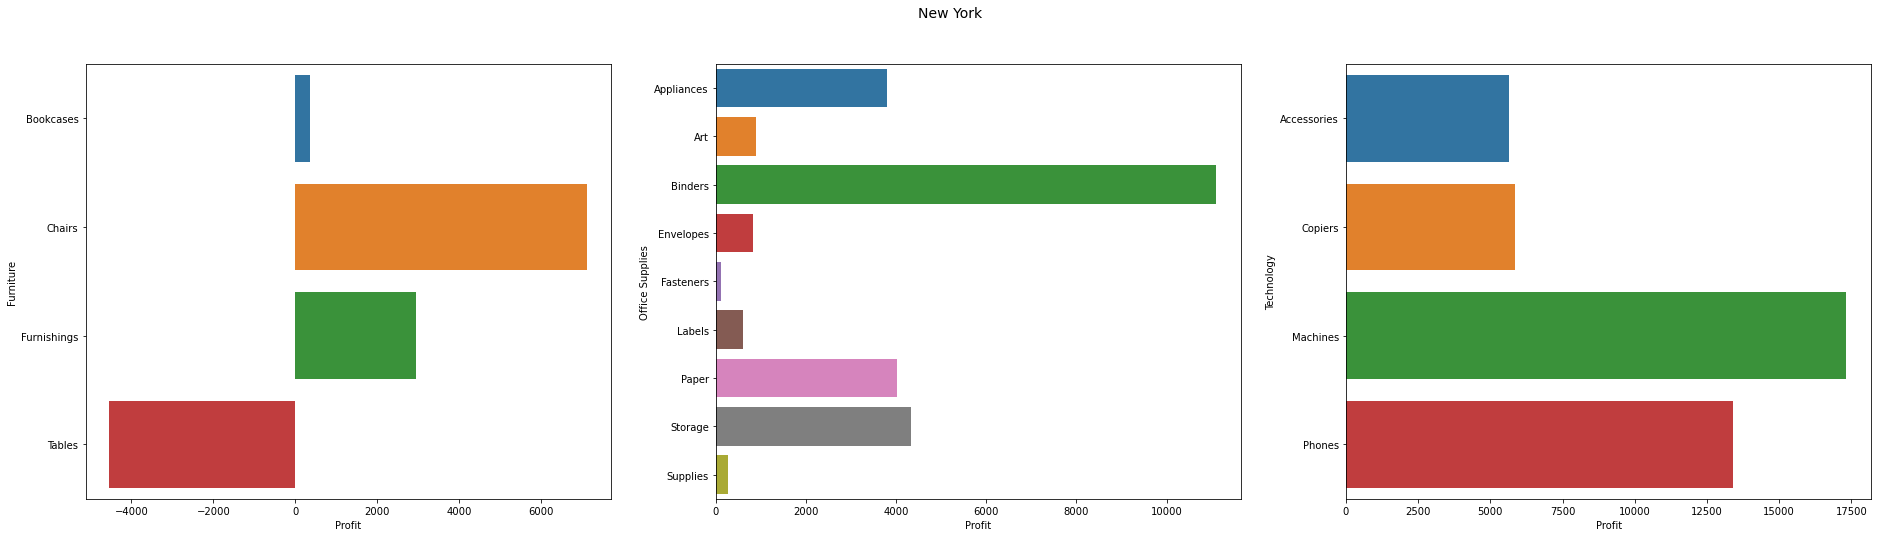

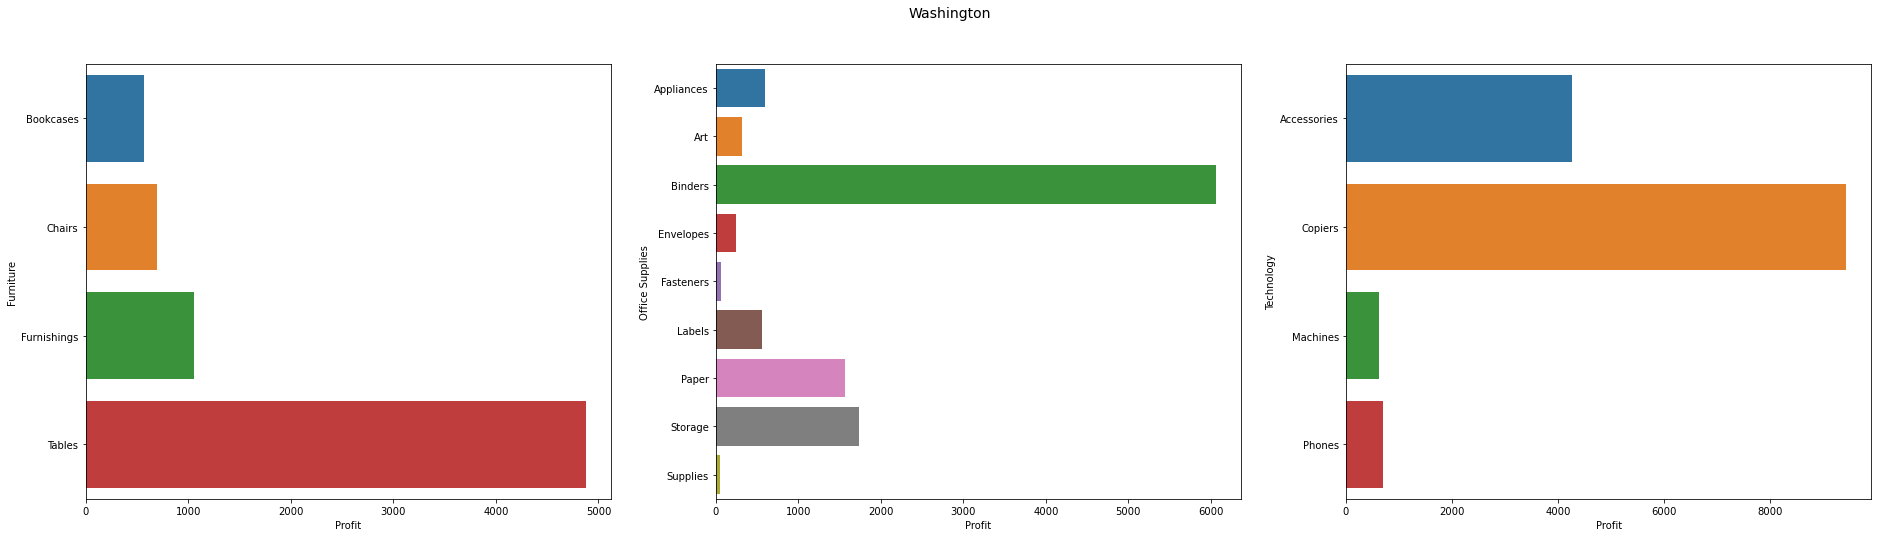

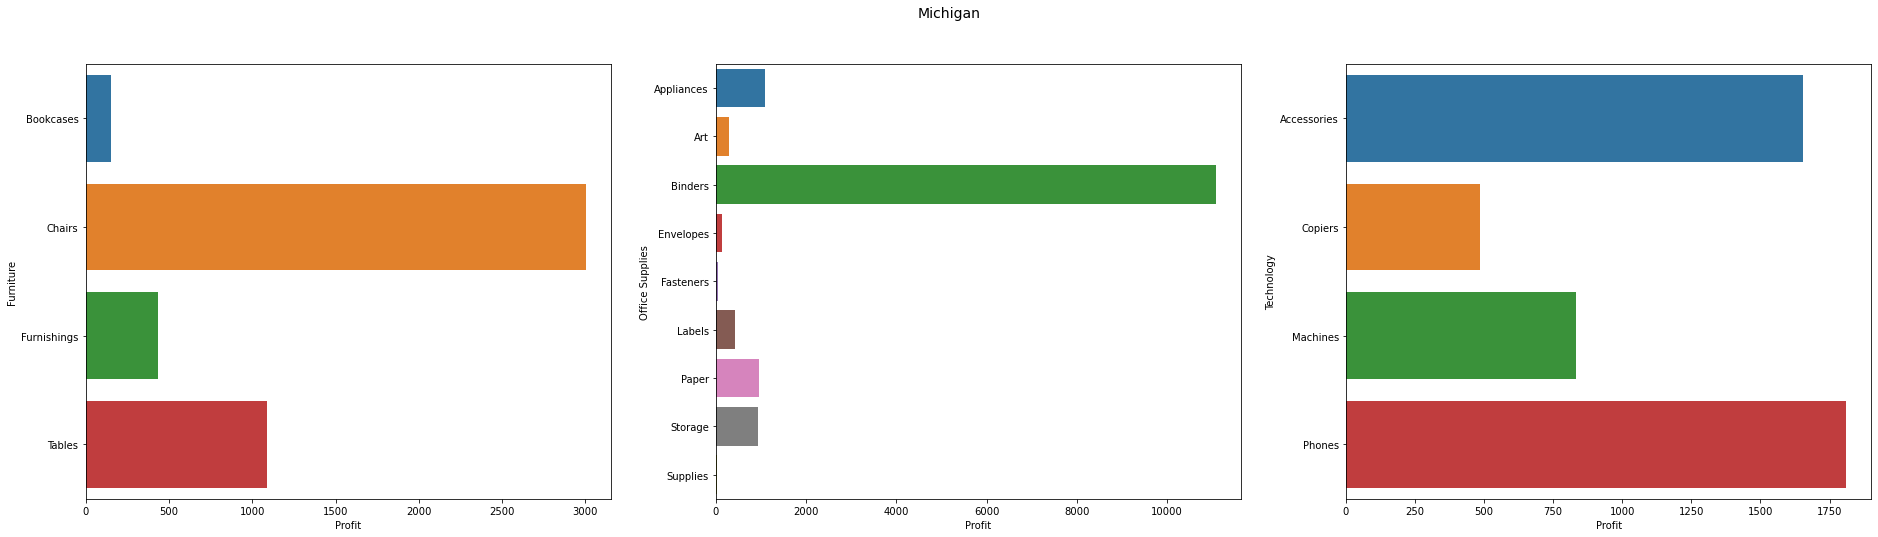

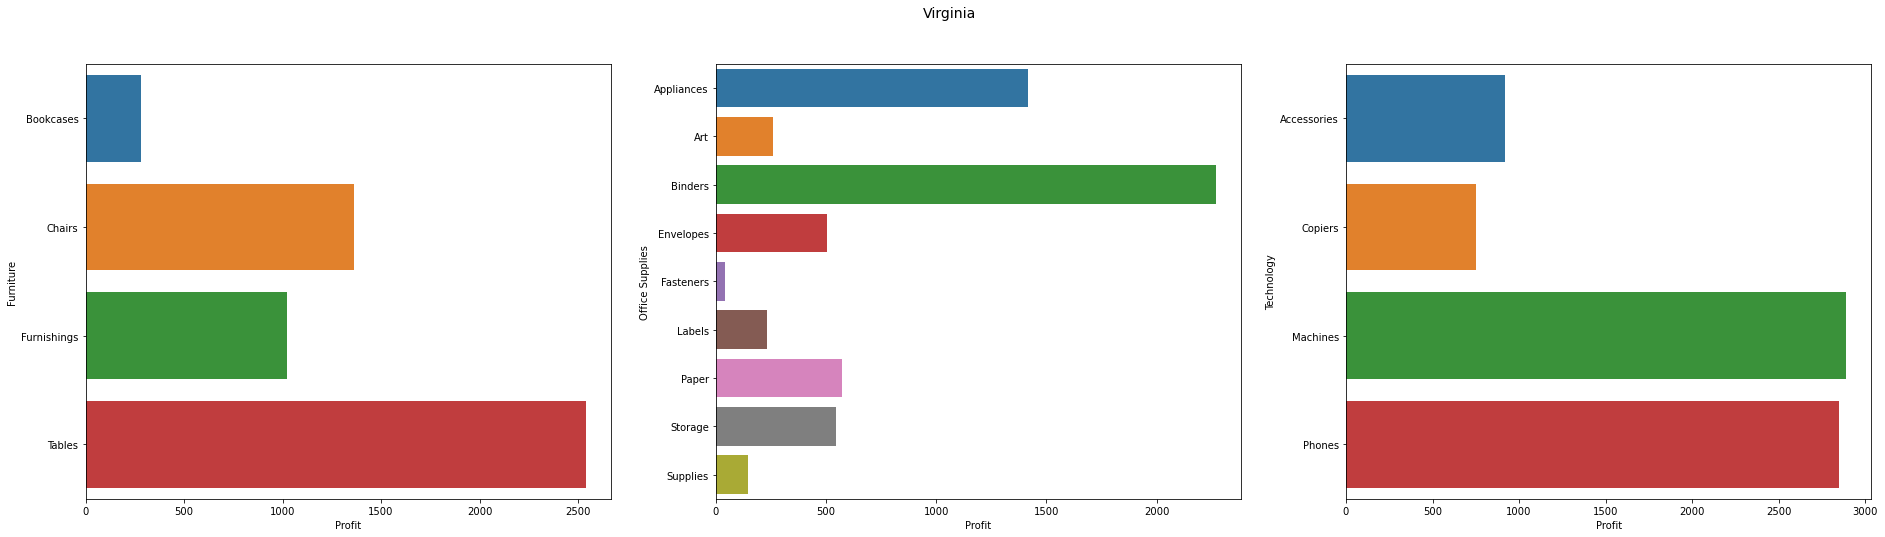

In [57]:
states = ['California', 'New York', 'Washington', 'Michigan', 'Virginia']
state_data_viewer(states)

###  9.Quantity

In [58]:
quantity = df.groupby('Sub-Category').sum()['Quantity'].sort_values(ascending=False)

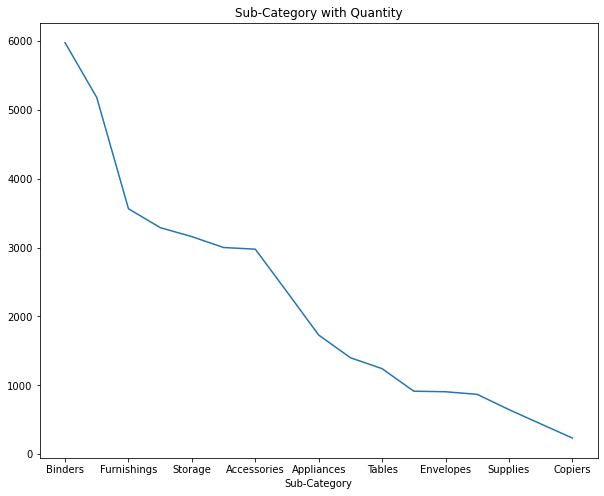

In [59]:
plt.figure(figsize=(10,8))
plt.title('Sub-Category with Quantity')
quantity.plot()

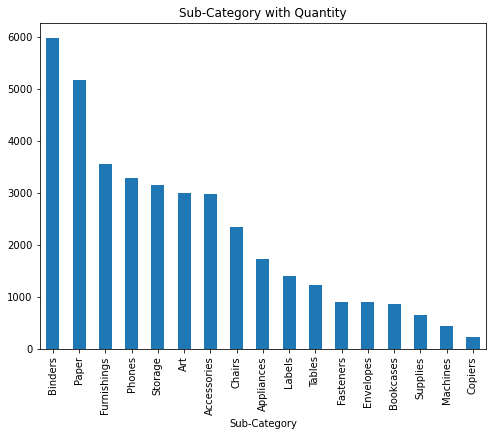

In [60]:

plt.figure(figsize=(8,6))
plt.title('Sub-Category with Quantity')
quantity.plot(kind = 'bar')
# sns.barplot(y='Quantity', x = 'Sub-Category', data = quantity)
plt.show()

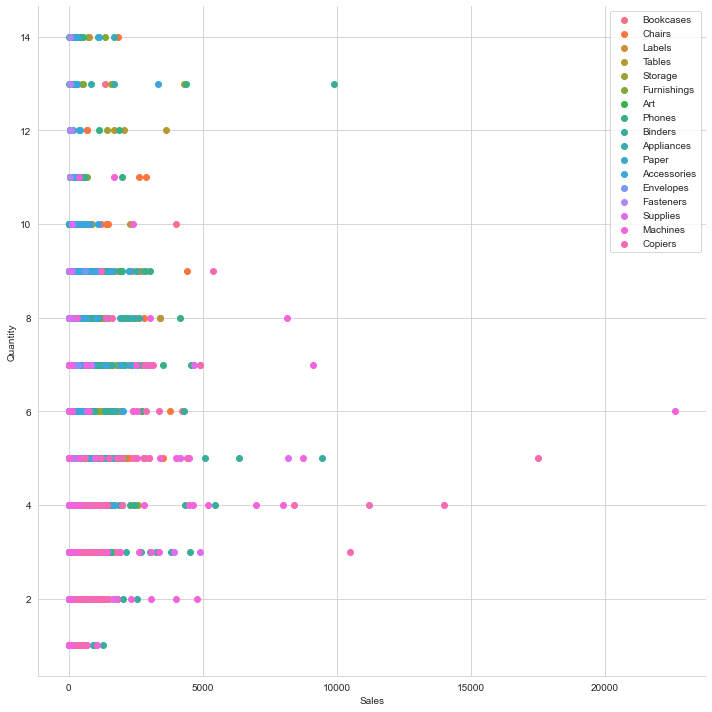

In [61]:
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Sub-Category",height = 10).map(plt.scatter,'Sales','Quantity')
plt.legend()
plt.show()

###  10.Correlation 

In [62]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [63]:
df.corr()['Profit'].sort_values(ascending= False)

Profit      1.000000
Sales       0.479064
Quantity    0.066253
Discount   -0.219487
Name: Profit, dtype: float64

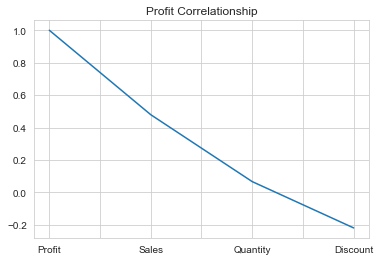

In [64]:
df.corr()['Profit'].sort_values(ascending= False).plot()
plt.title('Profit Correlationship')
plt.show()

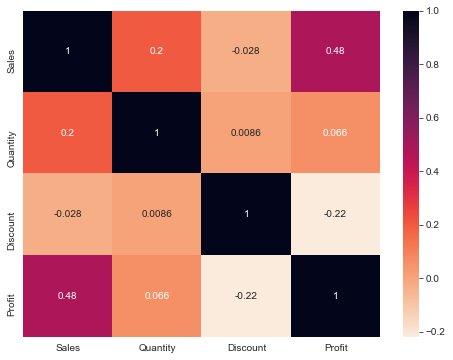

In [65]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap = 'rocket_r', annot=True)
plt.show()

# conclusion

CONCLUSION
1.Top 3 State where Profit are Highest:-

1)Vermont

2)Rhode Island

3)Indiana

2.Top 3 city where Profit are Highest:-
1)Jamestown

2)Independence

3)Lafayette

3.Top 3 State where Profit are Lowest:-
1)Ohio

2)Colorado

3)North Carolina

4.Top 3 City where Profit are Lowest:-
1)Bethlehem

2)Champaign

3)Oswego

5.Category:
1) High Profit --> Technology

2) Low Profit --> Furniture

6.Sub- Category:
1) High Profit --> Copier

2)Low Profit --> Machines

2) HIgh Sales--> Copier

3) HIgh Discount --> Binders , Machines and then tables

7.Segment:
1)High Profit & Sales --> Home-office

8.Sales:
1) Highest amount of sales --> Wyoming

2) Lowest Amount of Sales --> South Dakota

Correlations:
Sales and Profit are Positivily Correlated.

Discount and Profit are Negatively Correlated

Quantity and Profit are less Moderately Correlated.